In [43]:
from __future__ import print_function, division
import pandas as pd
import pylab as pl
import os
import json
import urllib2
import geopandas as gpd
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
def getEnergy(api, json_file):
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + json_file):
        response = urllib2.urlopen(api)
        data = response.read().decode("utf-8")
        data = json.loads(data)
        with open(json_file,'w') as file:
            json.dump(data, file, indent = 4)

In [3]:
EnergyJSON = os.getenv("PUIDATA")+'/Energy.json'
API = "https://data.cityofnewyork.us/resource/m46j-75iy.json"
getEnergy(API, EnergyJSON)

In [4]:
nrg = pd.read_json(EnergyJSON)

In [5]:
print (nrg.columns)
nrg.head()

Index([u'automatic_water_benchmarking_eligible', u'bbls_co_reported',
       u'borough', u'co_reported_bbl_status', u'direct_ghg_emissions_mtco2e',
       u'dof_benchmarking_submission_status', u'dof_number_of_buildings',
       u'dof_property_floor_area_buildngs_and_parking_ft2',
       u'energy_star_score', u'indirect_ghg_emissions_mtco2e',
       u'municipally_supplied_potable_water_indoor_intensity_gal_ft',
       u'nyc_borough_block_and_lot_bbl',
       u'primary_property_type_self_selected', u'record_number',
       u'reported_nyc_building_identificaiton_numbers_bins',
       u'reported_property_floor_area_building_s_ft', u'reported_water_method',
       u'site_eui_kbtu_ft2', u'source_eui_kbtu_ft2', u'street_name',
       u'street_number', u'total_ghg_emissions_mtco2e',
       u'weather_normalized_site_eui_kbtu_ft2',
       u'weather_normalized_source_eui_kbtu_ft2', u'zip_code'],
      dtype='object')


,automatic_water_benchmarking_eligible,bbls_co_reported,borough,co_reported_bbl_status,direct_ghg_emissions_mtco2e,dof_benchmarking_submission_status,dof_number_of_buildings,dof_property_floor_area_buildngs_and_parking_ft2,energy_star_score,indirect_ghg_emissions_mtco2e,...,reported_property_floor_area_building_s_ft,reported_water_method,site_eui_kbtu_ft2,source_eui_kbtu_ft2,street_name,street_number,total_ghg_emissions_mtco2e,weather_normalized_site_eui_kbtu_ft2,weather_normalized_source_eui_kbtu_ft2,zip_code
0,N/A,1000410001,Manhattan,NaN,NaN,BBL not valid,NaN,NaN,Not Available,NaN,...,918919,N/A,NaN,NaN,NaN,NaN,NaN,Not Available,Not Available,NaN
1,Yes,NaN,Queens,NaN,NaN,No Submission Matched to BBL,1.0,82730.0,NaN,NaN,...,#N/A,None,NaN,NaN,108 STREET,63-10,NaN,NaN,NaN,11375.0
2,N/A,2027620097,Bronx,NaN,NaN,BBL not valid,NaN,NaN,Not Available,NaN,...,64200,N/A,NaN,NaN,NaN,NaN,NaN,Not Available,Not Available,NaN
3,No,NaN,Manhattan,NaN,NaN,No Submission Matched to BBL,1.0,440360.0,NaN,NaN,...,#N/A,None,NaN,NaN,11 AVENUE,201,NaN,NaN,NaN,10001.0
4,N/A,2048300034,Bronx,NaN,NaN,Not on Covered Buildings List,NaN,NaN,Not Available,NaN,...,50000,None,NaN,NaN,NaN,NaN,NaN,Not Available,Not Available,NaN


In [6]:
def getMAPPLUTO(link, name):
    zip_name = name + ".zip"
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + zip_name):
        os.system("wget http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/mappluto_16v1.zip")
        os.system("mv " + zip_name + " " + os.getenv("PUIDATA"))
        os.system("unzip " + os.getenv("PUIDATA") + "/" + zip_name + " -d "+ os.getenv("PUIDATA") + "/" + name)

In [7]:
MAPPLUTO_link = "http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/mappluto_16v1.zip"
MAPPLUTO_name = "mappluto_16v1"
getMAPPLUTO(MAPPLUTO_link, MAPPLUTO_name)

In [8]:
bsize = gpd.read_file(os.getenv("PUIDATA") + '/' + MAPPLUTO_name +'/Manhattan/MNMapPLUTO.shp')

In [9]:
print (bsize.columns.values)

[u'APPBBL' u'APPDate' u'Address' u'AllZoning1' u'AllZoning2' u'AreaSource'
 u'AssessLand' u'AssessTot' u'BBL' u'BldgArea' u'BldgClass' u'BldgDepth'
 u'BldgFront' u'Block' u'BoroCode' u'Borough' u'BsmtCode' u'BuiltCode'
 u'BuiltFAR' u'CB2010' u'CD' u'CT2010' u'ComArea' u'CommFAR' u'CondoNo'
 u'Council' u'EDesigNum' u'Easements' u'ExemptLand' u'ExemptTot' u'Ext'
 u'FacilFAR' u'FactryArea' u'FireComp' u'GarageArea' u'HealthArea'
 u'HistDist' u'IrrLotCode' u'LandUse' u'Landmark' u'Lot' u'LotArea'
 u'LotDepth' u'LotFront' u'LotType' u'LtdHeight' u'MAPPLUTO_F' u'NumBldgs'
 u'NumFloors' u'OfficeArea' u'OtherArea' u'Overlay1' u'Overlay2'
 u'OwnerName' u'OwnerType' u'PLUTOMapID' u'PolicePrct' u'ProxCode'
 u'ResArea' u'ResidFAR' u'RetailArea' u'SHAPE_Area' u'SHAPE_Leng'
 u'SPDist1' u'SPDist2' u'Sanborn' u'SanitBoro' u'SanitDist' u'SanitSub'
 u'SchoolDist' u'SplitZone' u'StrgeArea' u'TaxMap' u'Tract2010' u'UnitsRes'
 u'UnitsTotal' u'Version' u'XCoord' u'YCoord' u'YearAlter1' u'YearAlter2'
 u'Year

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f479d0e4e10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f47ce926cd0>]], dtype=object)

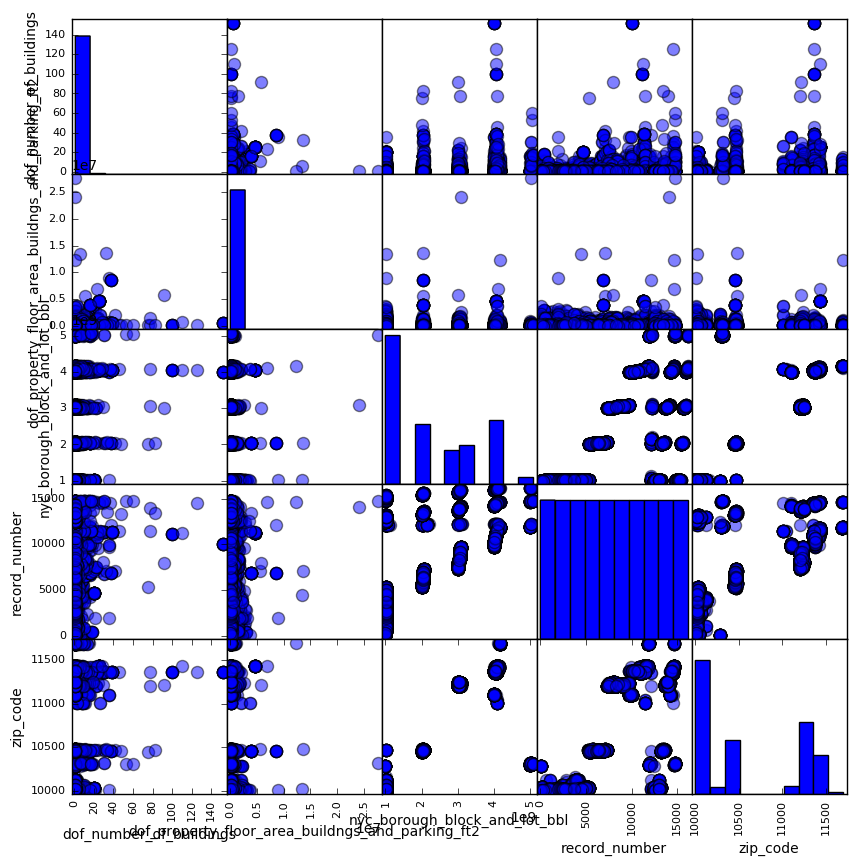

In [10]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix (nrg, s=300, figsize=(16, 16))

In [11]:
def canconvert(mydata):
    try :
        float(mydata)
        return True
    except ValueError:
        return False

In [12]:
nrg_interest_cols = ['site_eui_kbtu_ft2', 'reported_property_floor_area_building_s_ft']

for col in nrg_interest_cols:
    index = (np.vectorize(canconvert)(nrg[col]))
    nrg[col][~index] = float('NaN')

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# Merge data

In [14]:
nrg.rename(index=str, columns={"nyc_borough_block_and_lot_bbl": "BBL"}, inplace=True)

In [15]:
bblnrgdata = nrg.merge(bsize, how='inner', left_on='BBL', right_on='BBL')
#scatter_matrix (bblnrgdata, s=30, figsize=(16, 16))
bblnrgdata.head()

,automatic_water_benchmarking_eligible,bbls_co_reported,borough,co_reported_bbl_status,direct_ghg_emissions_mtco2e,dof_benchmarking_submission_status,dof_number_of_buildings,dof_property_floor_area_buildngs_and_parking_ft2,energy_star_score,indirect_ghg_emissions_mtco2e,...,YearAlter2,YearBuilt,ZMCode,ZipCode,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,ZoneMap,geometry
0,No,NaN,Manhattan,NaN,NaN,No Submission Matched to BBL,1.0,440360.0,NaN,NaN,...,0,1987,None,10001,M2-3,None,None,None,8b,"POLYGON ((982544.9469999969 212642.9668000042,..."
1,No,NaN,Manhattan,NaN,NaN,No Submission Matched to BBL,1.0,52390.0,NaN,NaN,...,0,1920,None,10009,R7A,R8B,None,None,12c,"POLYGON ((988632.9397999942 204610.9329999983,..."
2,No,Not Available,Manhattan,NaN,0,Filed,1.0,313200.0,68,3556.4,...,0,1977,Y,10022,C5-2,None,None,None,8c,"POLYGON ((993141.1744000018 216172.3948000073,..."
3,No,NaN,Manhattan,NaN,NaN,No Submission Matched to BBL,1.0,98260.0,NaN,NaN,...,0,1963,None,10003,C1-8,R8A,None,None,12c,"POLYGON ((989369.5851999968 206338.7575999945,..."
4,N/A,1007400013,Manhattan,NaN,NaN,Not on Covered Buildings List,NaN,NaN,Not Available,331.3,...,2000,1920,None,10011,R8B,None,None,None,8b,"POLYGON ((983418.6007999927 209632.8701999933,..."


In [20]:
bblnrgdata[['site_eui_kbtu_ft2', 'reported_property_floor_area_building_s_ft']] = \
    bblnrgdata[['site_eui_kbtu_ft2', 'reported_property_floor_area_building_s_ft']].apply(pd.to_numeric)

# Cut data

In [21]:
bblnrgdata['energy_total'] = np.asarray(bblnrgdata['site_eui_kbtu_ft2']) * np.asarray(bblnrgdata['reported_property_floor_area_building_s_ft'])

In [22]:
bblnrgdata_cut = bblnrgdata[bblnrgdata.energy_total>10000]
bblnrgdata_cut = bblnrgdata_cut[bblnrgdata_cut.UnitsTotal<1000]
bblnrgdata_cut = bblnrgdata_cut[bblnrgdata_cut.UnitsTotal>0]

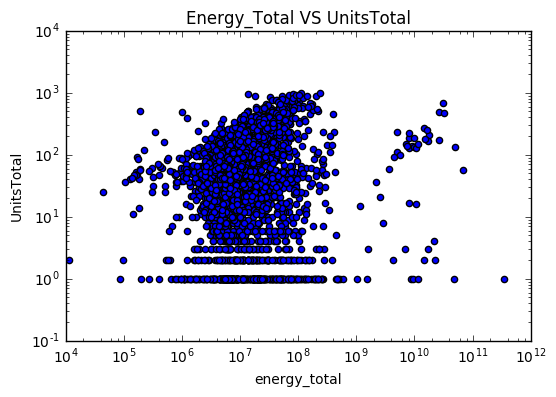

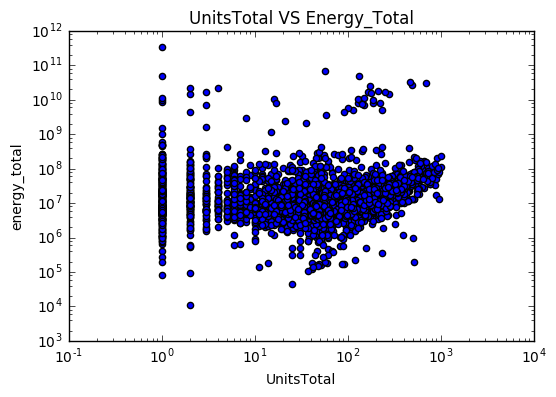

In [42]:
bblnrgdata_cut.plot(x='energy_total', y='UnitsTotal', loglog=True, kind='scatter', title="Energy_Total VS UnitsTotal")
bblnrgdata_cut.plot(y='energy_total', x='UnitsTotal', loglog=True, kind='scatter', title="UnitsTotal VS Energy_Total")

In [25]:
bblnrgdata_cut['log_energy_total']=np.log10(bblnrgdata_cut.energy_total)
bblnrgdata_cut['log_UnitsTotal']=np.log10(bblnrgdata_cut.UnitsTotal)

# Fit a line

In [26]:
import statsmodels.formula.api as smf

In [27]:
lm1 = smf.ols(formula="log_energy_total ~ log_UnitsTotal", data=bblnrgdata_cut).fit()

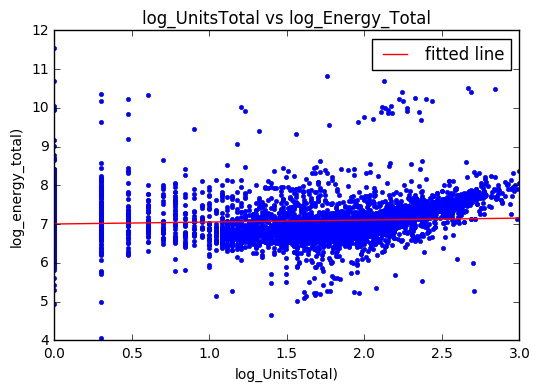

In [46]:
pl.plot(bblnrgdata_cut['log_UnitsTotal'],bblnrgdata_cut['log_energy_total'], 'g.',label="",c='blue') 
pl.title("log_UnitsTotal vs log_Energy_Total")
pl.plot([0,3], list(np.array([1,3])*lm1.params[1] + lm1.params[0]), c='red',label="fitted line")
pl.xlabel("log_UnitsTotal)")
pl.ylabel("log_energy_total)")
pl.legend()

In [30]:
lm2 = smf.ols(formula="log_UnitsTotal ~ log_energy_total", data=bblnrgdata_cut).fit()

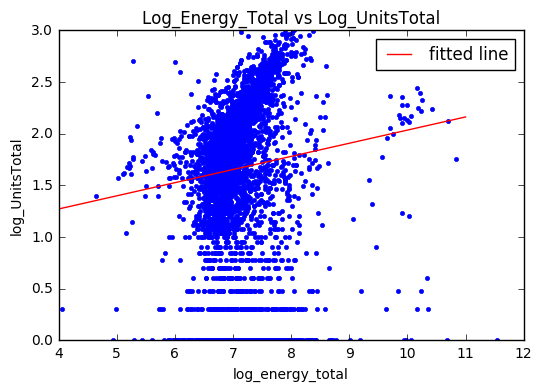

In [50]:
pl.plot(bblnrgdata_cut['log_energy_total'],bblnrgdata_cut['log_UnitsTotal'], 'g.', label="", c='blue') 
pl.title("Log_Energy_Total vs Log_UnitsTotal")
pl.plot([4,11],list(np.array([4,11])*lm2.params[1] + lm2.params[0]), c='red', label="fitted line")
pl.ylabel("log_UnitsTotal")
pl.xlabel("log_energy_total")
pl.legend()